# Data Mining - Exploratory Data Analysis 🔎
**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:** Desc here

### Import libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as pearsonr
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag

### Data Cleaning
This code performs data preprocessing on 'movies_df' in two main steps:

1. Conversion of string values in numeric columns ('castMenAmount' and 'castWomenAmount') to actual numerical values.

2. Identification and replacement of unrealistically high values in the 'castMenAmount' and 'castWomenAmount' columns with NaN (Not a Number).

In [32]:
# Read the data from the 'movies.csv' file and store it in a DataFrame named 'movies_df'.
movies_df = pd.read_csv('Data/movies.csv', encoding='unicode_escape')

# Convert string values in numeric columns to actual numbers. If conversion fails, replace with NaN.
movies_df[['castMenAmount', 'castWomenAmount']] = movies_df[['castMenAmount', 'castWomenAmount']].apply(pd.to_numeric, errors='coerce')

# Replace values in 'castMenAmount' and 'castWomenAmount' columns that are unrealistically high with NaN,
# as these values likely represent errors or outliers.
movies_df[['castMenAmount', 'castWomenAmount']] = np.where(movies_df[['castMenAmount', 'castWomenAmount']] > 1000, np.nan, movies_df[['castMenAmount', 'castWomenAmount']])

# Replace displaced values in 'actors' with NaN
movies_df['actors'] = movies_df['actors'].replace("FALSE", np.nan)

# Convert string values 'actorsCharacter' into their simplest form for counting purposes
movies_df['actorsCharacter'] = movies_df['actorsCharacter'].str.replace(r'(Himself|Herself|Self)(.*?)(?=\||$)', 'Self', regex=True)
movies_df['actorsCharacter'] = movies_df['actorsCharacter'].str.replace(r'(?<=\|)(\(voice\))(.*?)(?=\||$)', 'Voice', regex=True)
movies_df['actorsCharacter'] = movies_df['actorsCharacter'].str.replace(r'(?<=.)\|\|\|*(?=.|$)', '|', regex=True)
movies_df['actorsCharacter'] = movies_df['actorsCharacter'].str.replace(r'\|$|^\|', '', regex=True)

# Remove empty entries and replace country names with their respective ISO 3166 codes
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'(?<=.)\|\|*(?=.|$)', '|', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'\|$|^\|', '', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'Bolivia', 'BO', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'Argentina', 'AR', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'Indonesia', 'ID', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'Mexico', 'MX', regex=True)
movies_df['productionCompanyCountry'] = movies_df['productionCompanyCountry'].str.replace(r'Spain', 'ES', regex=True)

# Display the DataFrame to visualize the changes made.
movies_df

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15.0,9.0
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3.0,9.0
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5.0,62.0
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5.0,18.0
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,920081,0,Action|Horror,NaN,NaN,NaN,NaN,0.0,100,False,...,16.662,2021-11-26,6.8,108,2,1,1,10,2.0,4.0
9996,920143,0,Comedy,NaN,Caracol Televisión|Dago García Producciones,CO|CO,Colombia,0.0,97,False,...,491.706,2021-12-25,1.5,2,1,2,1,8,1.0,1.0
9997,922017,0,Comedy,NaN,NaN,NaN,Nigeria,0.0,112,False,...,565.658,2021-12-17,6.1,30,1,1,17,1,0.0,NaN
9998,922162,0,NaN,https://www.netflix.com/title/81425229,NaN,NaN,United States of America,0.0,59,False,...,9.664,2021-12-17,6.0,1,1,0,0,0,NaN,NaN


### Exercise I - Data Description
Performing a quick exploration by summarizing the dataset.

In [33]:
# Create a new DataFrame 'movies_df_describe' excluding the 'id' column.
movies_df_describe = movies_df.loc[:, movies_df.columns != 'id']

# Generate descriptive statistics for only the quantitative columns.
movies_df_describe.describe(include=[np.number])

,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9838.000000,9478.000000
mean,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,7.148201,14.119434
std,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,6.281767,13.131693
min,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,3.000000,6.000000
50%,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,6.000000,11.000000
75%,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,9.000000,19.000000
max,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,106.000000,626.000000


### Exercise II - Variable Types


| Campo                               | Tipo de Variable       |
|:-----------------------------------:|:----------------------:|
| popularidad                         | Cuantitativa Continua  |
| presupuesto                         | Cuantitativa Continua  |
| ingresos                            | Cuantitativa Continua  |
| título_original                     | Cualitativa Nominal    |
| idioma_original                     | Cualitativa Nominal    |
| título                              | Cualitativa Nominal    |
| página_de_inicio                    | Cualitativa Nominal    |
| video                               | Cualitativa Nominal    |
| director                            | Cualitativa Nominal    |
| duración                            | Cuantitativa Continua  |
| géneros                             | Cualitativa Nominal    |
| cantidad_de_géneros                 | Cuantitativa Discreta  |
| compañía_de_producción              | Cualitativa Nominal    |
| cantidad_de_producciones            | Cuantitativa Discreta  |
| país_de_la_compañía_de_producción  | Cualitativa Nominal    |
| país_de_producción                  | Cualitativa Nominal    |
| cantidad_de_países_de_producción    | Cuantitativa Discreta  |
| fecha_de_lanzamiento                | Cualitativa Ordinal    |
| cantidad_de_votos                   | Cuantitativa Discreta  |
| promedio_de_votos                   | Cuantitativa Continua  |
| actores                             | Cualitativa Nominal    |
| popularidad_de_actores              | Cuantitativa Continua  |
| personaje_de_actores                | Cualitativa Nominal    |
| cantidad_de_actores                 | Cuantitativa Discreta  |
| cantidad_de_mujeres_del_elenco      | Cuantitativa Discreta  |
| cantidad_de_hombres_del_elenco      | Cuantitativa Discreta  |

### Exercise III - Variable Dist.

In [34]:
# Select only the numeric variables from the DataFrame
numeric_df = movies_df.select_dtypes(include=[np.number])

# Exclude the 'id' column from the numeric variables DataFrame
numeric_df = numeric_df.loc[:, numeric_df.columns != 'id']

# Iterate over each column in the numeric DataFrame
for column in numeric_df:
    # Drop any null values from the current column
    columnSeriesObj = numeric_df[column].dropna()

    # Apply the Lilliefors test to the data of each column in numeric_df
    stat, p_value = diag.lilliefors(columnSeriesObj.values)

    # Determine if the column follows a normal distribution based on the p-value
    if p_value <= 0.05: 
        print(f'{column} does not follow a normal distribution.\n')
    else:
        print(f'{column} follows a normal distribution.\n')

budget does not follow a normal distribution.

revenue does not follow a normal distribution.

runtime does not follow a normal distribution.

popularity does not follow a normal distribution.

voteAvg does not follow a normal distribution.

voteCount does not follow a normal distribution.

genresAmount does not follow a normal distribution.

productionCoAmount does not follow a normal distribution.

productionCountriesAmount does not follow a normal distribution.

actorsAmount does not follow a normal distribution.

castWomenAmount does not follow a normal distribution.

castMenAmount does not follow a normal distribution.



### Frequency Tables

In [35]:
# Iterate over every column in the dataframe
for column in movies_df.columns:
    # If column data type is Object, split and melt each entry in the column
    if movies_df[column].dtype == 'O':
        try:
            df_split = movies_df[column].str.split('|', expand=True)
            df_melted = pd.melt(df_split, value_name=column)
            df_melted = df_melted.drop(columns=['variable'])
            freqTable = df_melted[column].dropna().value_counts().reset_index()
        # If the either the split or melt fail, treat the column as a simple text entry
        except:
            freqTable = movies_df[column].dropna().value_counts().reset_index()

        freqTable.columns = [column, 'Frequency']

        # Table formatting
        freqTable[column] = freqTable[column].astype(str).str.center(20)
        freqTable['Frequency'] = freqTable['Frequency'].astype(str).str.center(20)
        freqTable.columns = [col.center(20) for col in freqTable.columns]

        print(f"Frequency Table for {column}:\n{freqTable}\n")

Frequency Table for genres:
           genres              Frequency      
0          Drama                  3789        
1          Comedy                 3018        
2          Action                 2632        
3         Thriller                2565        
4        Adventure                1769        
5          Horror                 1512        
6        Animation                1460        
7         Romance                 1428        
8          Family                 1407        
9         Fantasy                 1284        
10    Science Fiction             1267        
11         Crime                  1225        
12        Mystery                 804         
13        History                 406         
14         Music                  315         
15      Documentary               299         
16        TV Movie                276         
17          War                   275         
18        Western                 120         

Frequency Table for homePage:
 

### Exercise IV
4.1 Top 10 Movies With Highest Budgets

In [36]:
# Sort the DataFrame in descending order based on the 'budget' column.
sorted_df = movies_df.sort_values(by='budget', ascending=False)

# Select only the 'originalTitle' and 'budget' columns and limit to the top 10 results.
sample_df = sorted_df.loc[:, ['originalTitle', 'budget']].head(10).reset_index()

# Print the header for the top 10 movies with the highest budgets.
print('Top 10 Movies With Highest Budgets')

# Initialize a variable to enumerate the movies (used only for printing).
index = 1 

# Iterate over the DataFrame.
for ind in sample_df.index:
    # Retrieve the title of the movie.
    title = sample_df['originalTitle'][ind]
    # Retrieve the budget of the movie.
    budget = sample_df['budget'][ind]
    # Print the movie title and budget formatted with commas and two decimal places.
    print(f'{index}. {title} - ${budget:,.2f}')
    # Increment the index for the next movie.
    index += 1

Top 10 Movies With Highest Budgets
1. Pirates of the Caribbean: On Stranger Tides - $380,000,000.00
2. Avengers: Age of Ultron - $365,000,000.00
3. Avengers: Endgame - $356,000,000.00
4. Justice League - $300,000,000.00
5. Avengers: Infinity War - $300,000,000.00
6. Pirates of the Caribbean: At World's End - $300,000,000.00
7. Superman Returns - $270,000,000.00
8. The Lion King - $260,000,000.00
9. Tangled - $260,000,000.00
10. Spider-Man 3 - $258,000,000.00


4.2 Top 10 Movies With Highest Revenue

In [37]:
# Sort the DataFrame in descending order based on the 'revenue' column.
sorted_df = movies_df.sort_values(by='revenue', ascending=False)

# Select only the 'originalTitle' and 'revenue' columns and limit to the top 10 results.
sample_df = sorted_df.loc[:, ['originalTitle', 'revenue']].head(10).reset_index()

# Print the header for the top 10 movies with the highest revenue.
print('Top 10 Movies With Highest Revenue')

# Initialize a variable to enumerate the movies (used only for printing).
index = 1 

# Iterate over the DataFrame.
for ind in sample_df.index:
    # Retrieve the title of the movie.
    title = sample_df['originalTitle'][ind]
    # Retrieve the revenue of the movie.
    revenue = sample_df['revenue'][ind]
    # Print the movie title and revenue formatted with commas and two decimal places.
    print(f'{index}. {title} - ${revenue:,.2f}')
    # Increment the index for the next movie.
    index += 1

Top 10 Movies With Highest Revenue
1. Avatar - $2,847,246,203.00
2. Avengers: Endgame - $2,797,800,564.00
3. Titanic - $2,187,463,944.00
4. Star Wars: The Force Awakens - $2,068,223,624.00
5. Avengers: Infinity War - $2,046,239,637.00
6. Jurassic World - $1,671,713,208.00
7. The Lion King - $1,667,635,327.00
8. Spider-Man: No Way Home - $1,631,853,496.00
9. The Avengers - $1,518,815,515.00
10. Furious 7 - $1,515,047,671.00


4.3 Top Movie With Highest Vote Count

4.4 Top Movie With Lowest Vote Avg.

In [38]:
# Sort the DataFrame in ascending order based on the 'voteAvg' column.
sorted_df = movies_df.sort_values(by='voteAvg', ascending=True)

# Select only the 'title' and 'voteAvg' columns and limit to the first 2 results.
sample_df = sorted_df.loc[:, ['title', 'voteAvg']].head(2).reset_index()

# Print the header for the top movie with the lowest vote average.
print('Top Movie With Lowest Vote Avg.')

# Retrieve the title of the movie with the lowest vote average.
title = sample_df['title'][0]
# Retrieve the vote average of the movie.
voteAvg = sample_df['voteAvg'][0]
# Print the movie title and vote average.
print(f'1. {title} - {voteAvg:,}')

Top Movie With Lowest Vote Avg.
1. DAKAICHI -I'm Being Harassed by the Sexiest Man of the Year- The Movie: In Spain - 1.3


4.5 Top Year for Number of Movie Releases

4.6 Genre of the 20 most recent movies and genre that predominates in the entire dataset

In [39]:
# Select only the 'title', 'genres' and 'releaseDate' columns and get the first entry of the 'genres' list
genresDF = movies_df[['title', 'genres', 'releaseDate']]
genresDF['genres'] = genresDF['genres'].str.split('|', expand=True)[0]

# Table formatting
with pd.option_context('display.max_colwidth', 30):
    print(genresDF.sort_values(by=['releaseDate'], ascending=False).head(20))

                              title       genres releaseDate
9516        A Shot Through the Wall        Drama  2022-01-21
9545                        Presque       Comedy  2022-01-19
9197                Italian Studies        Drama  2022-01-14
9808                     See for Me     Thriller  2022-01-07
9586                 American Siege       Action  2022-01-07
9982  Harry Potter 20th Annivers...  Documentary  2022-01-01
9951                 WWE Day 1 2022       Action  2022-01-01
9257               Return of Chucky          NaN  2021-12-31
9241             Karem, La Posesión          NaN  2021-12-31
9866    Gabriel's Rapture: Part One      Romance  2021-12-31
9683    Hilda and the Mountain King    Animation  2021-12-30
9877                    The Kindred       Horror  2021-12-28
9988                  Death to 2021       Comedy  2021-12-27
9346                          Lulli       Comedy  2021-12-26
9253              American Underdog        Drama  2021-12-25
9996                    

C:\Users\agria\AppData\Local\Temp\ipykernel_22992\3021721321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genresDF['genres'] = genresDF['genres'].str.split('|', expand=True)[0]


<Axes: xlabel='Genre', ylabel='Count'>

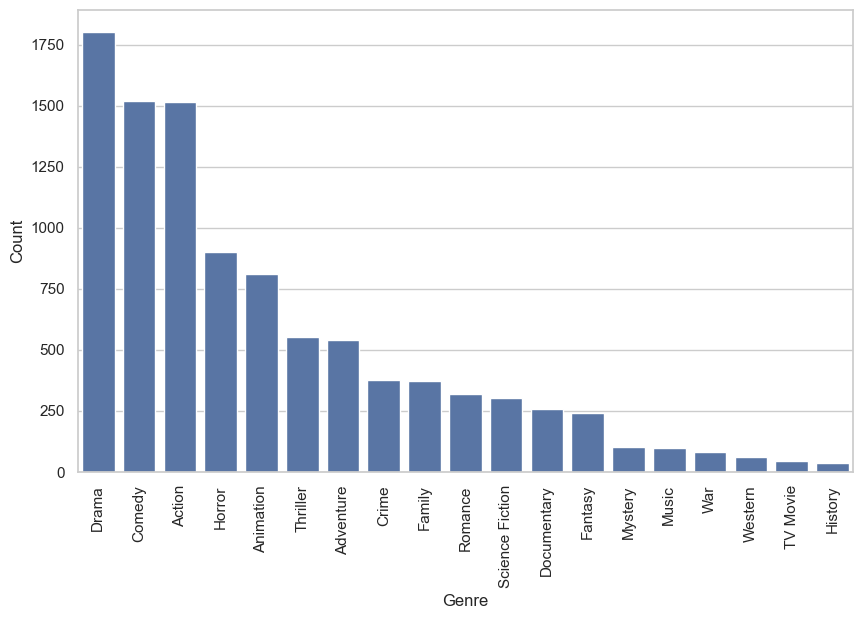

In [40]:
# Pyplot settings
plt.figure(figsize=(10, 6))
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Graph frequency table using Seaborn barplot
sns.barplot(genresDF.value_counts('genres').sort_values(ascending=False))

4.7 Top Genre Based On Profit

4.8 Number of actors influence on income and amount of actors been in recent years

Pearson Correlation Value: -0.0019879843741634705


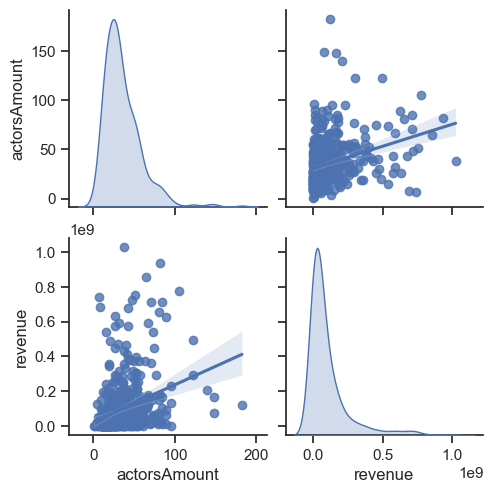

In [41]:
# Selecting the columns 'actorsAmount' and 'revenue' from the movies dataframe.
sample_df = movies_df.loc[:, ['actorsAmount', 'revenue']]

# Filtering out rows where revenue is not equal to zero.
sample_df = sample_df[sample_df['revenue'] != 0]

# Calculating Pearson correlation coefficient between 'actorsAmount' and 'revenue'.
print(f"Pearson Correlation Value: {sample_df['actorsAmount'].corr(sample_df['revenue'])}")

# Setting the seaborn style to "ticks" with color codes enabled.
sns.set(style="ticks", color_codes=True)

# Generating a pairplot of a random sample of 500 rows from the dataframe, with a kernel density estimate on the diagonal and a linear regression fit.
g = sns.pairplot(sample_df.sample(500), diag_kind="kde", kind="reg")

# Displaying the pairplot.
plt.show()

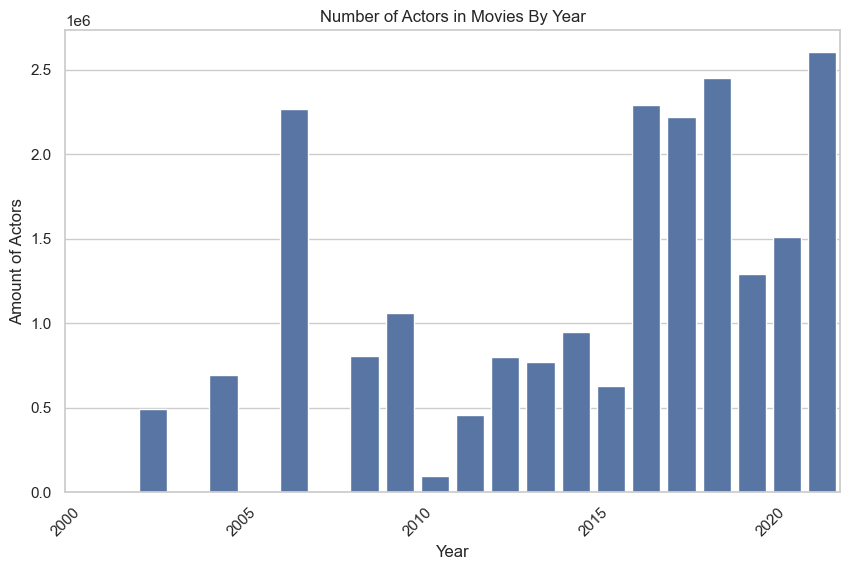

In [42]:
# Selecting the columns 'actorsAmount' and 'releaseDate' from the movies dataframe.
sample_df = movies_df.loc[:, ['actorsAmount', 'releaseDate']] 

# Converting the 'releaseDate' column to datetime data type.
sample_df['releaseDate'] = pd.to_datetime(sample_df['releaseDate'])

# Extracting the year from the 'releaseDate' and creating a new column 'year'.
sample_df['year'] = sample_df['releaseDate'].dt.year 

# Grouping the data by 'year' and summing up the 'actorsAmount' for each year.
sample_df = sample_df.groupby(['year'])['actorsAmount'].sum().reset_index() 

# Filtering out the data  to focus on representative data.
sample_df = sample_df[sample_df['actorsAmount'] > 4000] 

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Creating a bar plot showing the number of actors in movies by year.
graph = sns.barplot(data=sample_df, x="year", y="actorsAmount")

plt.xlabel('Year')
plt.ylabel('Amount of Actors')
plt.title('Number of Actors in Movies By Year')

# Showing only every 5th x-tick label and hiding others.
for ind, label in enumerate(graph.get_xticklabels()):
    if ind % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

# Rotating x-tick labels for better readability.
plt.xticks(rotation=45, ha='right')

plt.show()